In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.1f}'.format


In [52]:
train = pd.read_csv('preprocessed_data/preprocessed_train.csv', index_col=0)
test = pd.read_csv('preprocessed_data/preprocessed_test.csv', index_col=0)

In [53]:
train

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,release_year,release_month,release_day,season,dir_prev_bfnum_len,dir_prev_bfnum_sum,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0.0,0,91,2,2012,11,22,0,1,0.0,23398
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.5,2,387,3,2015,11,19,0,4,5305814.5,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.2,4,343,4,2013,6,5,0,2,220775.2,6959083
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.0,2,20,6,2012,7,12,1,2,23894.0,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,신근호,1.0,1,251,2,2010,11,4,0,2,1.0,483387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,111,청소년 관람불가,심성보,3833.0,1,510,7,2014,8,13,1,2,3833.0,1475091
596,파파로티,(주)쇼박스,드라마,127,15세 관람가,윤종찬,496061.0,1,286,6,2013,3,14,0,2,496061.0,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,99,청소년 관람불가,김대현,0.0,0,123,4,2010,9,30,1,1,0.0,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,102,15세 관람가,백운학,0.0,0,431,4,2015,5,14,0,1,0.0,2192525


In [54]:
train["new_distributor"] = train["distributor"].apply(lambda x: x.replace("(주)","").replace("엔터테인먼트","").replace(" ",""))
train[["distributor", "new_distributor"]].nunique()

distributor        169
new_distributor    159
dtype: int64

In [55]:
train["new_distributor"].unique()

array(['롯데', '쇼박스', 'NEW', '쇼박스미디어플렉스', '백두대간', '유니버설픽쳐스인터내셔널코리아', '두타연',
       '케이알씨지', '콘텐츠윙', '키노아이', '팝파트너스', 'CJE&M영화부문', '영화제작전원사',
       'CJE&MPictures', 'CGV무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ', 'CGV아트하우스',
       '조이앤시네마', '인디플러그', '콘텐츠판다', '인디스토리', '팝', '시네마서비스', '웃기씨네',
       '영화사진진', '레인보우팩토리', '김기덕필름', 'CJCGV', '동국대학교충무로영상제작센터', 'BoXoo',
       '마운틴픽쳐스', '메가박스플러스엠', '골든타이드픽처스', '파이오니아21', '디씨드', '드림팩트', '시너지',
       '디마', '판다미디어', '스톰픽쳐스코리아', '예지림', '영화사조제', '보람', '시네마달', '노바',
       '패스파인더씨앤씨', '대명문화공장', '온비즈넷', 'KT&G상상마당', '무비꼴라쥬', '인벤트디',
       '씨네그루키다리이엔티', '스튜디오후크', '나이너스', 'THE픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션픽처스', '이스트스카이필름', '필라멘트픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴픽처스', '휘', '이십세기폭스코리아', '피터팬픽쳐스', '에스와이코마드', '더픽쳐스', '오퍼스픽쳐스',
       '고앤고필름', '사람과사람들', 'JK필름', '씨너스', 'KT', '싸이더스FNH', '프레인글로벌',
       '나우콘텐츠', '홀리가든', '브릿지웍스', '엣나인필름', '위더스필름', '에이원', 'OAL(올)',
       '싸이더스', '전망좋은영화사', '스토리셋', '이상우필름', '씨네굿필름', '영희야놀자', '찬란', '어썸피플',
       '아방가르드필름',

<AxesSubplot:xlabel='new_distributor', ylabel='box_off_num'>

/Users/taehoon/miniconda3/envs/movies/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  func(*args, **kwargs)
/Users/taehoon/miniconda3/envs/movies/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/Users/taehoon/miniconda3/envs/movies/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44852 (\N{HANGUL SYLLABLE GGOL}) missing from current font.
  func(*args, **kwargs)
/Users/taehoon/miniconda3/envs/movies/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  func(*args, **kwargs)
/Users/taehoon/miniconda3/envs/movies/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51564 (\N{HANGUL SYLLABLE JYU}) missing from current font.
  func(*args, **kwargs)
/Users/taehoon/minicon

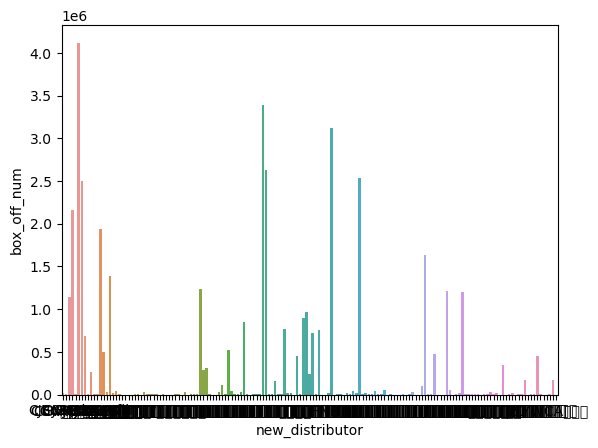

In [56]:
dist2boxnum = train.groupby(["new_distributor"])["box_off_num"].apply(lambda x: sum(x)/len(x)).reset_index()
sns.barplot(data=dist2boxnum, x="new_distributor", y="box_off_num")

<AxesSubplot:xlabel='new_time', ylabel='box_off_num'>

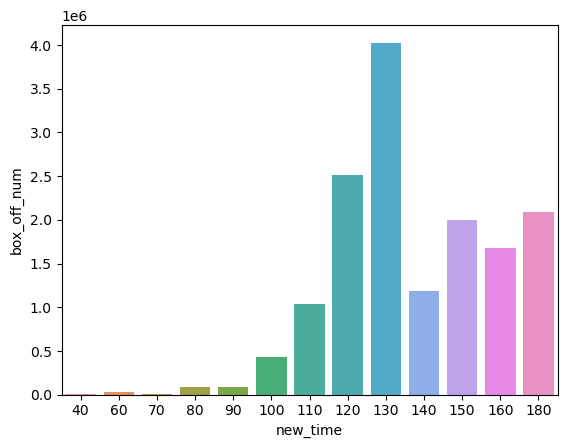

In [57]:
train["new_time"] = train["time"].apply(lambda x: 10*int(x/10))
boxPtime = train.groupby(["new_time"])["box_off_num"].apply(lambda x: sum(x)/len(x)).reset_index().sort_values("new_time")
sns.barplot(data=boxPtime, x="new_time",y="box_off_num")

In [70]:
dist = train.groupby(["new_distributor"])["box_off_num"].apply(len).reset_index()
dist[dist["box_off_num"]==1]

,new_distributor,box_off_num
1,CGV무비꼴라쥬,1
4,CJCGV,1
7,JK필름,1
8,KBS미디어,1
11,M2픽처스,1
...,...,...
151,피터팬픽쳐스,1
153,필름라인,1
154,하준사,1
155,한국YWCA연합회,1


<AxesSubplot:xlabel='new_time', ylabel='box_off_num'>

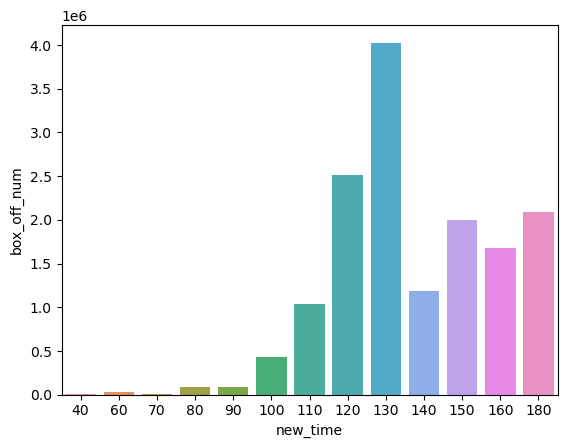

In [59]:
train["new_time"] = train["time"].apply(lambda x: 10*int(x/10))
boxPtime = train.groupby(["new_time"])["box_off_num"].apply(lambda x: sum(x)/len(x)).reset_index().sort_values("new_time")
sns.barplot(data=boxPtime, x="new_time",y="box_off_num")

In [60]:
train.nunique()

title                 600
distributor           169
genre                  12
time                   86
screening_rat           4
director              472
dir_prev_bfnum        266
dir_prev_num            6
num_staff             296
num_actor              17
release_year            6
release_month          12
release_day            31
season                  2
dir_prev_bfnum_len      5
dir_prev_bfnum_sum    217
box_off_num           586
new_distributor       159
new_time               13
dtype: int64

In [61]:
train["release_year"].sort_values()

302    2010
421    2010
199    2010
397    2010
83     2010
       ... 
103    2015
377    2015
374    2015
229    2015
598    2015
Name: release_year, Length: 600, dtype: int64

In [62]:
test["release_year"].sort_values()

0      2010
19     2010
20     2010
21     2010
22     2010
       ... 
212    2015
213    2015
214    2015
216    2015
242    2015
Name: release_year, Length: 243, dtype: int64

<AxesSubplot:>

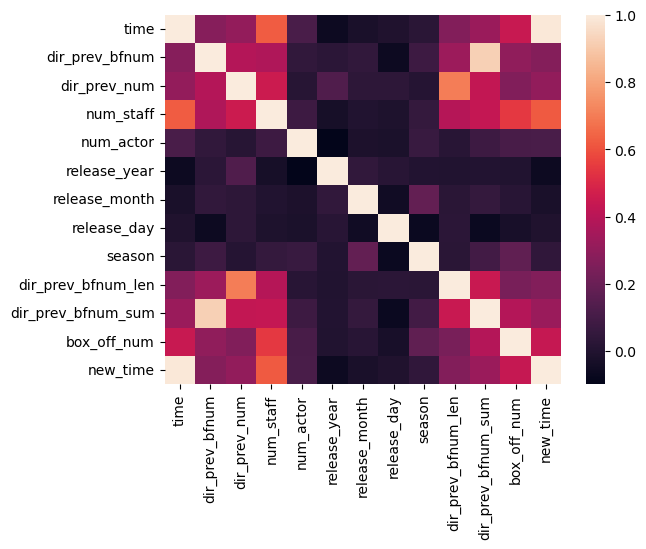

In [63]:
train.corr()
sns.heatmap(train.corr())

In [64]:
train.shape

(600, 19)